# HQNN-Parallel MedicalMNIST Local

- Model: HQNN-Parallel
- Dataset: MedicalMNIST
- Computer: local machine (lightning.qubit)


In [1]:
# --- Import Model Components from Python File ---
import sys
from pathlib import Path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))
from hqnn_parallel import HQNNParallel
from utils import load_medical_mnist, train_model, save_model, predict_image, evaluate_model, load_model
import random

ClassicalConvBlock test passed.
ParallelQuantumLayer test passed.
ClassicalDenseLayer test passed.
HQNNParallel model test passed.


In [2]:
# --- Load and Preprocess MNIST Data ---
from torchvision import transforms

# Define the transformation to apply
transform = transforms.Compose([
    transforms.Resize((244, 244)), # Original size
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_dataset, test_dataset = load_medical_mnist(transform, train_test_split=0.8, dataset_portion=1.00)

Path to Medical MNIST dataset files:  /Users/jaimanmunshi/.cache/kagglehub/datasets/andrewmvd/medical-mnist/versions/1
Total samples in Medical MNIST dataset: 58954
Using 47164 samples for training and 11790 samples for testing.


In [3]:
# --- Define Hyperparameters ---
hyperparams = {
    'n_qubits': 5,
    'n_circuits': 4,
    'depth': 3,
    'in_channels': 3,   # Medical MNIST is rgb images
    'n_classes': 6,     # Medical MNIST has 6 classes
    'device': 'lightning.qubit',
    'epochs': 10, # training hyperparameter
    'batch_size': 32 # training hyperparameter
}

In [4]:
# --- Initialize the Model --- 
model = HQNNParallel(**hyperparams)

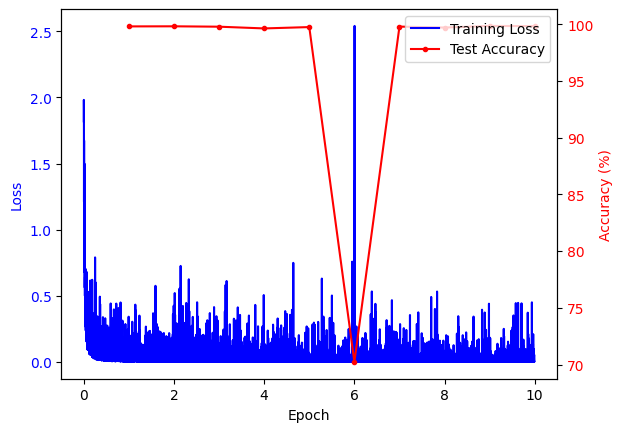

Starting training...
Epoch [1/10], Step [122/1474], Loss: 0.1560
Epoch [1/10], Step [244/1474], Loss: 0.0544
Epoch [1/10], Step [366/1474], Loss: 0.0409
Epoch [1/10], Step [488/1474], Loss: 0.0658
Epoch [1/10], Step [610/1474], Loss: 0.0523
Epoch [1/10], Step [732/1474], Loss: 0.0873
Epoch [1/10], Step [854/1474], Loss: 0.0087
Epoch [1/10], Step [976/1474], Loss: 0.0534
Epoch [1/10], Step [1098/1474], Loss: 0.0314
Epoch [1/10], Step [1220/1474], Loss: 0.0514
Epoch [1/10], Step [1342/1474], Loss: 0.1377
Epoch [1/10], Step [1464/1474], Loss: 0.0052
Epoch [1/10] - Test Accuracy: 99.80%
Epoch [2/10], Step [122/1474], Loss: 0.0098
Epoch [2/10], Step [244/1474], Loss: 0.0185
Epoch [2/10], Step [366/1474], Loss: 0.0021
Epoch [2/10], Step [488/1474], Loss: 0.0056
Epoch [2/10], Step [610/1474], Loss: 0.0752
Epoch [2/10], Step [732/1474], Loss: 0.0063
Epoch [2/10], Step [854/1474], Loss: 0.1081
Epoch [2/10], Step [976/1474], Loss: 0.0230
Epoch [2/10], Step [1098/1474], Loss: 0.0184
Epoch [2/10],

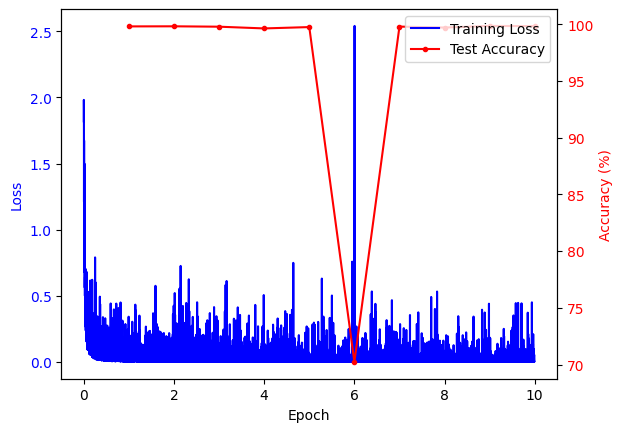

In [5]:
# -- Train the Model ---
history = train_model(
    model,
    train_dataset,
    test_dataset,
    plot=True,
    **hyperparams
)

In [6]:
# --- Save the Model ---
save_model(model, hyperparams, history, 'hqnn_parallel_medicalmnist_lightning')

Model saved to models/hqnn_parallel_medicalmnist_lightning/hqnn_parallel_medicalmnist_lightning_20250724_211350.pth


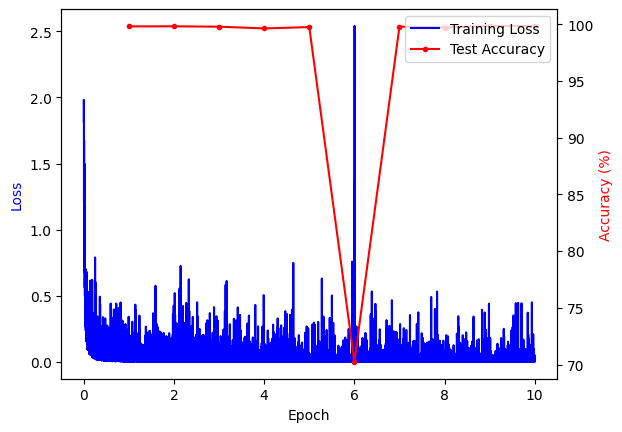

In [3]:
# Optionally load a saved model to evaluate
model = load_model(
    HQNNParallel, 
    'models/hqnn_parallel_medicalmnist_lightning/hqnn_parallel_medicalmnist_lightning_20250724_211350.pth'
)

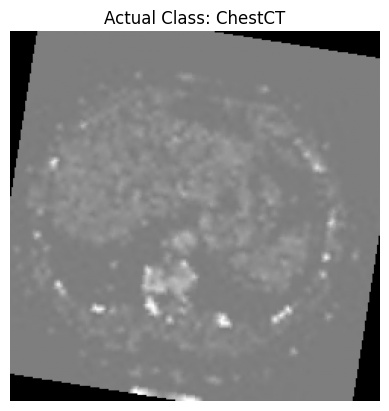

Class AbdomenCT : 0.0000
Class BreastMRI : 0.0000
Class CXR       : 0.0000
Class ChestCT   : 1.0000
Class Hand      : 0.0000
Class HeadCT    : 0.0000
Predicted Class: ChestCT, Confidence: 1.0000


In [4]:
# --- Run Model Prediction on Random Image ---
predict_image(model, test_dataset)

Evaluating Model: 100%|██████████| 11790/11790 [09:54<00:00, 19.82it/s] 


              precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00      1905
   BreastMRI       1.00      1.00      1.00      1771
         CXR       1.00      1.00      1.00      2048
     ChestCT       1.00      1.00      1.00      2024
        Hand       1.00      1.00      1.00      2013
      HeadCT       1.00      1.00      1.00      2029

    accuracy                           1.00     11790
   macro avg       1.00      1.00      1.00     11790
weighted avg       1.00      1.00      1.00     11790



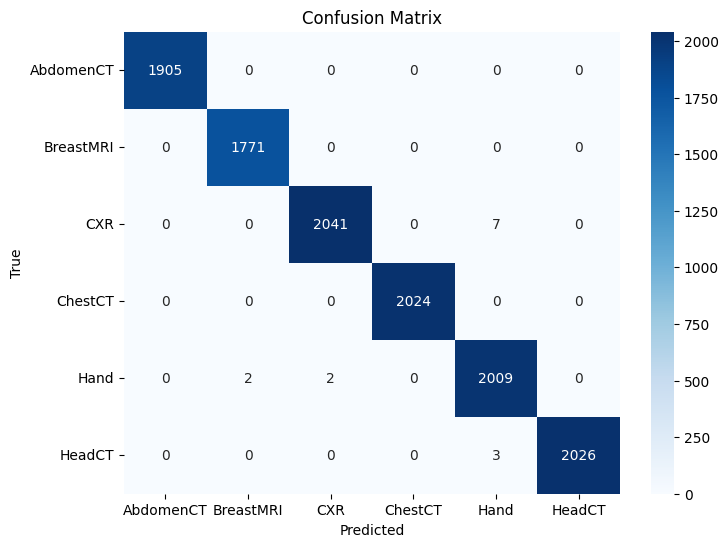

In [5]:
# --- Evaluate Model ---
test_accuracy = evaluate_model(model, test_dataset)